In [3]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import po, ast
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


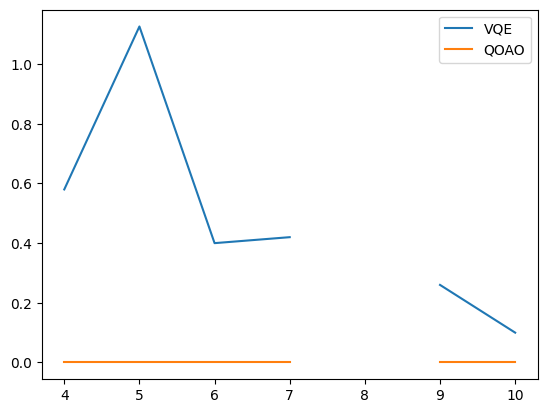

In [4]:
accum_error_vqes, accum_error_qoaos = [], []
num_assets = range(4, 11)
for i in num_assets:
    result = pd.read_csv(f'./result_{i}.csv')

    accum_error_vqe, accum_error_qoao = [], []
    for i in range(0, len(result)):
        accum_error_vqe.append(po.hamming(ast.literal_eval(result['list selection numpy'][i]), ast.literal_eval(result['list selection vqe'][i])))
        accum_error_qoao.append(po.hamming(ast.literal_eval(result['list selection numpy'][i]), ast.literal_eval(result['list selection qoao'][i])))


    accum_error_vqes.append(np.mean(accum_error_vqe))
    accum_error_qoaos.append(np.mean(accum_error_qoao))
    
plt.plot(num_assets, accum_error_vqes, label = 'VQE')
plt.plot(num_assets, accum_error_qoaos, label = 'QOAO')
plt.legend()